In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import keras
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
def load_dataset(path):
    data = load_files(path)
    alphabet_files = np.array(data['filenames'])
    targets = np.array(data['target'])
    alphabet_targets = np_utils.to_categorical(targets, 50)
    
    return alphabet_files, alphabet_targets, targets

In [ ]:
train_files, train_targets, raw_train_targets = load_dataset('/content/gdrive/MyDrive/BasicFinalDatabase/Train')
test_files, test_targets, raw_test_targets = load_dataset('/content/gdrive/MyDrive/BasicFinalDatabase/Test')

In [ ]:
# load list of characters
alphabets = [item[25:-1] for item in sorted(glob("/content/gdrive/MyDrive/BasicFinalDatabase/Train/*/"))]

In [ ]:
# print statistics about the dataset
print('There are %d total alphabets' % len(alphabets))
print('There are %s total alphabet images.\n' % len(np.hstack([train_files, test_files])))
print('There are %d training alphabet images.' % len(train_files))
print('There are %d test alphabet images.'% len(test_files))

There are 50 total alphabets
There are 14269 total alphabet images.

There are 12010 training alphabet images.
There are 2259 test alphabet images.


In [ ]:
def plot_dist(target_set):
    plt.figure(figsize=(6,4))
    labels, values = zip(*target_set.items())
    #indexes = np.arange(len(labels))
    width = 0.8
    plt.bar(labels, values, width)
    plt.xlabel('Alphabets')
    plt.ylabel('Frequency')
    plt.show()

Distribution of the training data in the dataset


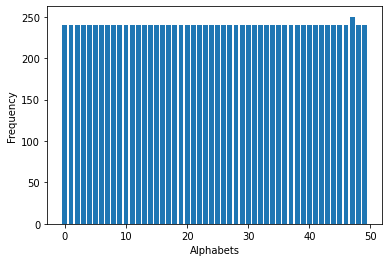

Distribution of the test data in the dataset


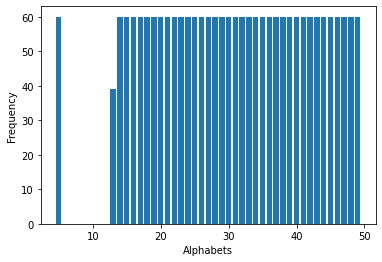

In [ ]:
print('Distribution of the training data in the dataset')    
plot_dist(Counter(raw_train_targets))
print('Distribution of the test data in the dataset') 
plot_dist(Counter(raw_test_targets))

In [ ]:
from keras.preprocessing import image                  
from keras.preprocessing.image import img_to_array, load_img
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True 

In [ ]:
#Scan through the training dataset to pick up one random character each folder
alphabet_folders = sorted(glob("/content/gdrive/MyDrive/BasicFinalDatabase/Train/*/"))
sample_files = []
for folder in alphabet_folders:
    sample_files.append(glob(folder + "*.bmp")[np.random.randint(0,49)])
sample_files = np.array(sample_files)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


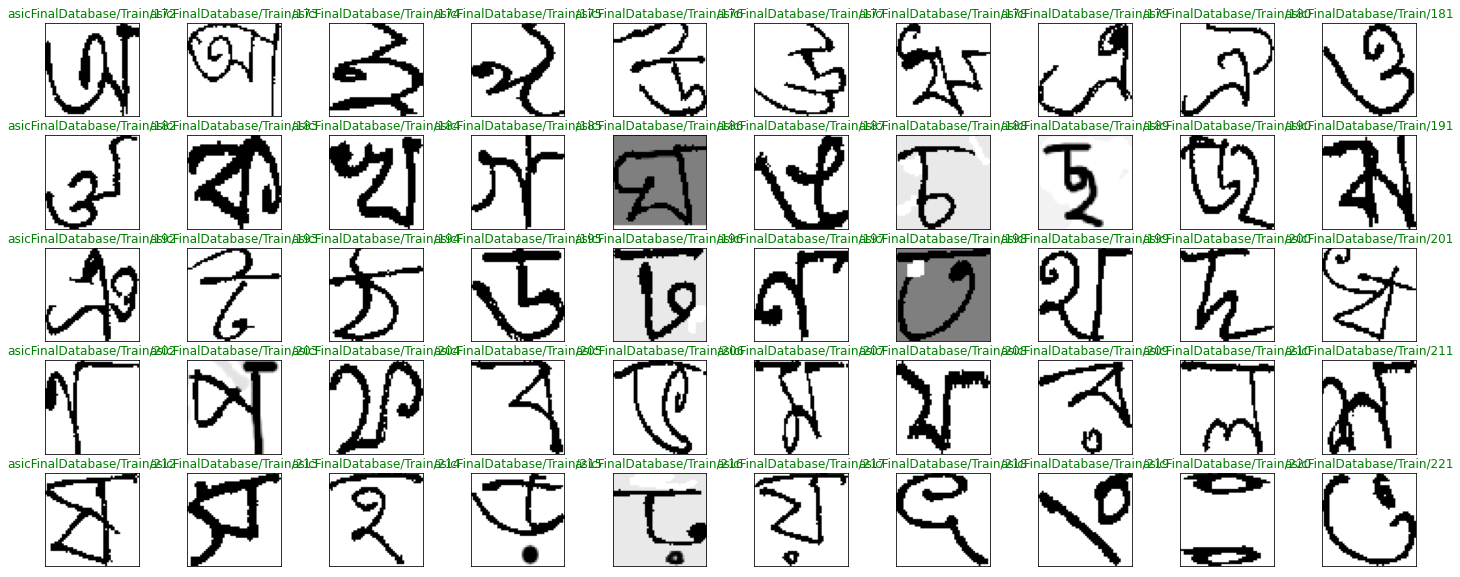

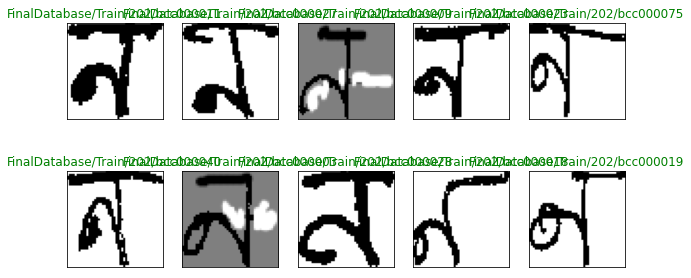

In [ ]:
#Display the characters
fig = plt.figure(figsize=(25,10))
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(load_img(sample_files[i], target_size=(50,50), grayscale=True)), cmap = 'gray')
    ax.set_title("{}".format(alphabets[i]),color="green")
sample_files = []
folder = '/content/gdrive/MyDrive/BasicFinalDatabase/Train/202/'
for i in range(10):    
    sample_files.append(glob(folder + "*.bmp")[np.random.randint(0, 49)])

sample_files = np.array(sample_files)

fig = plt.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(load_img(sample_files[i], target_size=(50,50), grayscale=True)), cmap = 'gray')
    ax.set_title("{}".format(sample_files[i][29:-4]),
                 color="green")
    

from sklearn.model_selection import train_test_split
train_files, valid_files, train_targets, valid_targets = train_test_split(train_files, train_targets, test_size = 0.2, random_state = 0, stratify = raw_train_targets)

In [ ]:
# print statistics about the dataset post split
print('There are %d total alphabets' % len(alphabets))
print('There are %s total alphabet images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training alphabet images.' % len(train_files))
print('There are %d validation alphabet images.' % len(valid_files))
print('There are %d test alphabet images.\n'% len(test_files))

There are 50 total alphabets
There are 14269 total alphabet images.

There are 9608 training alphabet images.
There are 2402 validation alphabet images.
There are 2259 test alphabet images.



Distribution of the validation data in the dataset


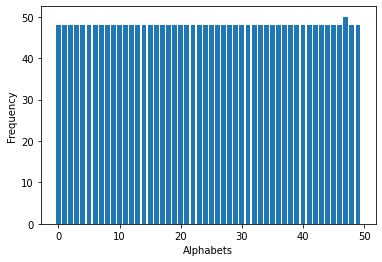

In [ ]:
# Show distribution of data in validation set
raw_valid_targets = []
for i in range(len(valid_targets)):
    raw_valid_targets.append(np.argmax(valid_targets[i]))
    
raw_valid_targets = np.array(raw_valid_targets)
print('Distribution of the validation data in the dataset')  
plot_dist(Counter(raw_valid_targets))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


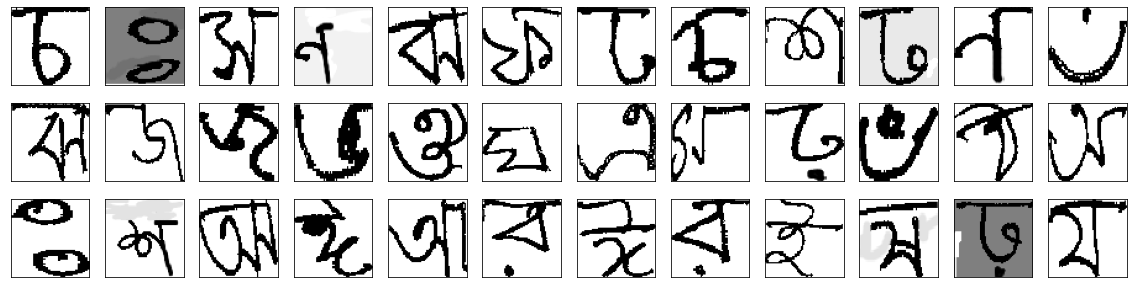

In [ ]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(load_img(valid_files[i], target_size=(64,64), grayscale=True)), cmap = 'gray')
    

In [ ]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = load_img(img_path, target_size=(64, 64), grayscale=True)
    # convert PIL.Image.Image type to 3D tensor with shape (64, 64, 3)
    x = img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 64, 64, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in img_paths]
    return np.vstack(list_of_tensors)

# pre-process the data for Keras. We rescale the images by dividing every pixel in every image by 255. 
# So the scale is now 0-1 instead of 0-255.
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

# print number of training, validation, and test images
print(train_tensors.shape[0], 'train samples')
print(valid_tensors.shape[0], 'valid samples')
print(test_tensors.shape[0], 'test samples')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


9608 train samples
2402 valid samples
2259 test samples


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense

In [ ]:
# Initialising the CNN
model = Sequential()

# First Convolution Layer with Pooling
model.add(Conv2D(filters=16, kernel_size=2, padding='valid', activation='relu', input_shape=(train_tensors.shape[1:])))
model.add(MaxPooling2D(pool_size=2))

# Adding a second convolutional layer with Pooling
model.add(Conv2D(filters=32, kernel_size=2, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size =2))

model.add(GlobalAveragePooling2D())

# Full connection Dense Layers
model.add(Dense(50, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 63, 63, 16)        80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 32)        2080      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                1650      
Total params: 3,810
Trainable params: 3,810
Non-trainable params: 0
____________________________________________________

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# Accuracy with random prediction is expected to be 1 in 50 so roughly 2%
alphabet_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(alphabet_predictions)==np.argmax(test_targets, axis=1))/len(alphabet_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 2.6560%


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense

In [ ]:
len(test_targets[0])

50

In [ ]:
# Initialising the CNN
model = Sequential()

# First Convolution Layer with Pooling
model.add(Conv2D(filters=16, kernel_size=2, padding='valid', activation='relu', input_shape=(train_tensors.shape[1:])))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

# Adding a second convolutional layer with Pooling
model.add(Conv2D(filters=32, kernel_size=2, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size =2))
model.add(Dropout(0.2))

# Adding a third convolutional layer with Pooling
model.add(Conv2D(filters=64, kernel_size=2, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size =2))
model.add(Dropout(0.2))

# Adding a fourth convolutional layer with Pooling
model.add(Conv2D(filters=128, kernel_size=2, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size =2))
model.add(Dropout(0.2))


# Adding a fifth convolutional layer with Pooling
model.add(Conv2D(filters=256, kernel_size=2, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size =2))
model.add(Dropout(0.2))



#model.add(GlobalAveragePooling2D())
model.add(Flatten())

# Full connection Dense Layers
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 63, 63, 16)        80        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        2080      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)       

In [ ]:
METRICS = ['accuracy',
           keras.metrics.TruePositives(name="tp"),
           keras.metrics.FalseNegatives(name='fp'),
           keras.metrics.TrueNegatives(name='tn'),
           keras.metrics.FalseNegatives(name='fn'),
           keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
           keras.metrics.Precision(name='precision'),
           keras.metrics.Recall(name='recall'),
           keras.metrics.AUC(name='auc')
           ]

In [ ]:
### Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=METRICS)

In [ ]:
from keras.callbacks import ModelCheckpoint  

#specify the number of epochs that you would like to use to train the model.

epochs = 50
batch_size = 32

checkpointer = ModelCheckpoint(filepath='/content/gdrive/MyDrive/BasicFinalDatabase/saved_models/weights.best.from_deepcnnwithDO.hdf5', 
                               verbose=1, save_best_only=True)

h=model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)


model.load_weights('/content/gdrive/MyDrive/BasicFinalDatabase/saved_models/weights.best.from_deepcnnwithDO.hdf5')

alphabet_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

from sklearn import metrics
y_true = [np.argmax(y_test) for y_test in test_targets]
f1_accuracy = 100* metrics.f1_score(y_true,alphabet_predictions, average = 'micro')
print('Test F1 accuracy: %.4f%%' % f1_accuracy)


Epoch 1/50
301/301 [==============================] - 7s 16ms/step - loss: 3.8442 - accuracy: 0.0344 - tp: 14.0033 - fp: 4833.7318 - tn: 237516.8675 - fn: 4833.7318 - categorical_accuracy: 0.0344 - precision: 0.2832 - recall: 0.0021 - auc: 0.5488 - val_loss: 3.6273 - val_accuracy: 0.0504 - val_tp: 0.0000e+00 - val_fp: 2402.0000 - val_tn: 117698.0000 - val_fn: 2402.0000 - val_categorical_accuracy: 0.0504 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6925

Epoch 00001: val_loss improved from inf to 3.62733, saving model to /content/gdrive/MyDrive/BasicFinalDatabase/saved_models/weights.best.from_deepcnnwithDO.hdf5
Epoch 2/50
301/301 [==============================] - 4s 14ms/step - loss: 3.4158 - accuracy: 0.0909 - tp: 55.3079 - fp: 4792.4272 - tn: 237496.3907 - fn: 4792.4272 - categorical_accuracy: 0.0909 - precision: 0.5748 - recall: 0.0097 - auc: 0.7601 - val_loss: 2.5617 - val_accuracy: 0.2481 - val_tp: 71.0000 - val_fp: 2331.0000 - val_tn: 117621.0000 - val_fn: 2

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    rotation_range=15, 
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest') # randomly rotate images by 15 degrees
# create and configure augmented image generator
datagen_valid = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    rotation_range=15, 
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')
# fit augmented image generator on data
datagen_train.fit(train_tensors)
datagen_valid.fit(valid_tensors)

from keras.callbacks import ModelCheckpoint   

batch_size = 256
epochs = 1
# train the model
checkpointer = ModelCheckpoint(filepath='/content/gdrive/MyDrive/BasicFinalDatabase/saved_models/weights.best.with_augmentation_new.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(datagen_train.flow(train_tensors, train_targets, batch_size=batch_size),
                    steps_per_epoch=train_tensors.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=datagen_valid.flow(valid_tensors, valid_targets, batch_size=batch_size),
                    validation_steps=valid_tensors.shape[0] // batch_size)



model.load_weights('/content/gdrive/MyDrive/BasicFinalDatabase/saved_models/weights.best.with_augmentation_new.hdf5')
#model.load_weights('saved_models/weights.best.with_augmentation.hdf5')
# get index of predicted alphabetnfor each image in test set
alphabet_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

from sklearn import metrics
y_true = [np.argmax(y_test) for y_test in test_targets]
f1_accuracy = 100* metrics.f1_score(y_true,alphabet_predictions, average = 'micro')
print('Test F1 accuracy: %.4f%%' % f1_accuracy)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


37/37 - 6s - loss: 1.5803 - accuracy: 0.5600 - val_loss: 1.2016 - val_accuracy: 0.6615

Epoch 00001: val_loss improved from inf to 1.20157, saving model to /content/gdrive/MyDrive/BasicFinalDatabase/saved_models/weights.best.with_augmentation_new.hdf5
Test F1 accuracy: 92.1647%


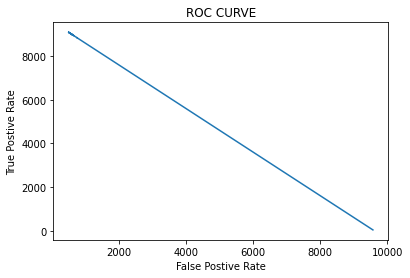

In [ ]:
plt.plot(h.history['fp'],h.history['tp'])
plt.title("ROC CURVE")
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.show()
##### Done Evabe baki gulate compile e metrics oi METRICS DIYE run korabi wati

In [ ]:
# Confusion Matrix
from sklearn.metrics import multilabel_confusion_matrix


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    rotation_range=15, 
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest') # randomly rotate images by 15 degrees

# create and configure augmented image generator
datagen_valid = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    rotation_range=15, 
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')

# fit augmented image generator on data
datagen_train.fit(train_tensors)
datagen_valid.fit(valid_tensors)

from keras.callbacks import ModelCheckpoint   

batch_size = 256
epochs = 1

# train the model
checkpointer = ModelCheckpoint(filepath='/content/gdrive/MyDrive/BasicFinalDatabase/saved_models/weights.best.with_augmentation_new.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(datagen_train.flow(train_tensors, train_targets, batch_size=batch_size),
                    steps_per_epoch=train_tensors.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=datagen_valid.flow(valid_tensors, valid_targets, batch_size=batch_size),
                    validation_steps=valid_tensors.shape[0] // batch_size)



model.load_weights('/content/gdrive/MyDrive/BasicFinalDatabase/saved_models/weights.best.with_augmentation_new.hdf5')
#model.load_weights('saved_models/weights.best.with_augmentation.hdf5')
# get index of predicted alphabetnfor each image in test set
alphabet_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

from sklearn import metrics
y_true = [np.argmax(y_test) for y_test in test_targets]
f1_accuracy = 100* metrics.f1_score(y_true,alphabet_predictions, average = 'micro')
print('Test F1 accuracy: %.4f%%' % f1_accuracy)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


37/37 - 5s - loss: 1.3998 - accuracy: 0.5944 - val_loss: 1.2307 - val_accuracy: 0.6424

Epoch 00001: val_loss improved from inf to 1.23066, saving model to /content/gdrive/MyDrive/BasicFinalDatabase/saved_models/weights.best.with_augmentation_new.hdf5
Test F1 accuracy: 92.7402%


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    rotation_range=15, 
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest') # randomly rotate images by 15 degrees

# create and configure augmented image generator
datagen_valid = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    rotation_range=15, 
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')

# fit augmented image generator on data
datagen_train.fit(train_tensors)
datagen_valid.fit(valid_tensors)

from keras.callbacks import ModelCheckpoint   

batch_size = 256
epochs = 1

# train the model
checkpointer = ModelCheckpoint(filepath='/content/gdrive/MyDrive/BasicFinalDatabase/saved_models/weights.best.with_augmentation_new.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(datagen_train.flow(train_tensors, train_targets, batch_size=batch_size),
                    steps_per_epoch=train_tensors.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=datagen_valid.flow(valid_tensors, valid_targets, batch_size=batch_size),
                    validation_steps=valid_tensors.shape[0] // batch_size)



model.load_weights('/content/gdrive/MyDrive/BasicFinalDatabase/saved_models/weights.best.with_augmentation_new.hdf5')
#model.load_weights('saved_models/weights.best.with_augmentation.hdf5')
# get index of predicted alphabetnfor each image in test set
alphabet_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

from sklearn import metrics
y_true = [np.argmax(y_test) for y_test in test_targets]
f1_accuracy = 100* metrics.f1_score(y_true,alphabet_predictions, average = 'micro')
print('Test F1 accuracy: %.4f%%' % f1_accuracy)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


37/37 - 5s - loss: 1.2943 - accuracy: 0.6156 - val_loss: 1.1048 - val_accuracy: 0.6814

Epoch 00001: val_loss improved from inf to 1.10475, saving model to /content/gdrive/MyDrive/BasicFinalDatabase/saved_models/weights.best.with_augmentation_new.hdf5
Test F1 accuracy: 92.8287%


In [ ]:
error_files = []
error_images = []
for i, idx in enumerate(np.random.choice(test_tensors.shape[0], size=30, replace=False)):
    pred_idx = alphabet_predictions[idx]
    true_idx = np.argmax(test_targets[idx])
    if pred_idx != true_idx:
         error_files.append(test_files[idx])
         error_images.append(idx)

error_files = np.array(error_files) 
error_images = np.array(error_images) 
errors=np.stack((error_images,error_files),axis=-1)
         

fig = plt.figure(figsize=(20,20))
i = 0 
for idx, pic in errors:
  idx = int(idx)
  ax = fig.add_subplot(10, 11, i + 1, xticks=[], yticks=[])
    
    #print ('Misclassified the file: ' + pic + ' As: ' + str (alphabet_predictions[idx] ) + ' instead of ' + str(np.argmax(test_targets[idx])) + ' Index: ' + str(idx))

  ax.imshow(np.squeeze(load_img(pic, target_size=(100,100), grayscale=True)), cmap = 'gray')
  ax.set_title("{} ({})".format(str (alphabet_predictions[idx] ), str(np.argmax(test_targets[idx]))),
                 color=("red"))
  i += 1

history=h   
def plot_history(history):
  loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
  val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
  acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
  val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
  if len(loss_list) == 0:
    print('Loss is missing in history')
  return 
    
    ## As loss always exists
  epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
  plt.figure(1)
  for l in loss_list:
    plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
  for l in val_loss_list:
    plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
      plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in loss_list:
      plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))  
       
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
plot_history(history)

<Figure size 1440x1440 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


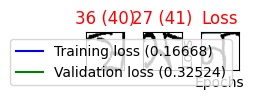

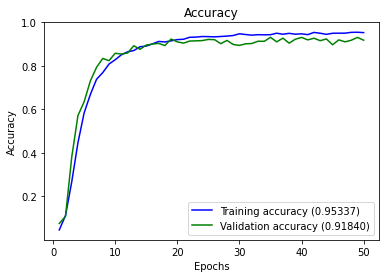

In [ ]:
error_files = []
error_images = []
for i, idx in enumerate(np.random.choice(test_tensors.shape[0], size=30, replace=False)):
    pred_idx = alphabet_predictions[idx]
    true_idx = np.argmax(test_targets[idx])
    if pred_idx != true_idx:
         error_files.append(test_files[idx])
         error_images.append(idx)

error_files = np.array(error_files) 
error_images = np.array(error_images) 
errors=np.stack((error_images,error_files),axis=-1)
         

##fig = plt.figure(figsize=(20,10))
fig=plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
i = 0 
for idx, pic in errors:
    idx = int(idx)
    ax = fig.add_subplot(10, 11, i + 1, xticks=[], yticks=[])
    
    #print ('Misclassified the file: ' + pic + ' As: ' + str (alphabet_predictions[idx] ) + ' instead of ' + str(np.argmax(test_targets[idx])) + ' Index: ' + str(idx))

    ax.imshow(np.squeeze(load_img(pic, target_size=(100,100), grayscale=True)), cmap = 'gray')
    ax.set_title("{} ({})".format(str (alphabet_predictions[idx] ), str(np.argmax(test_targets[idx]))),
                 color=("red"))
    i += 1
history=h   
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
plot_history(history)

In [ ]:
###confusion_matric
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true,alphabet_predictions)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 56,  0,  0],
       [ 0,  0,  0, ...,  0, 60,  0],
       [ 0,  0,  0, ...,  0,  0, 55]])

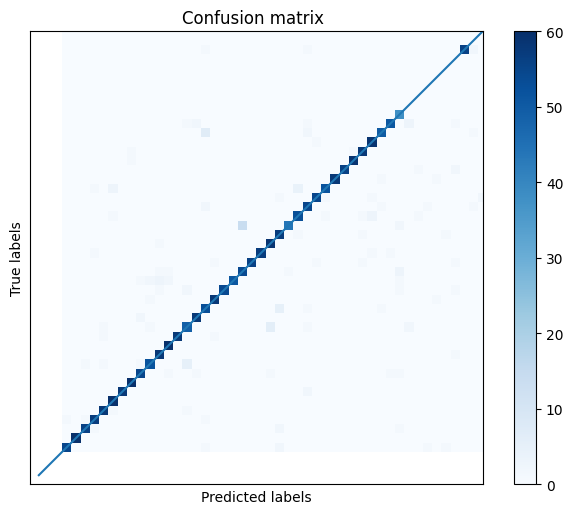

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
cm = confusion_matrix(y_true, alphabet_predictions)
plt.imshow(cm,cmap=plt.cm.Blues)
plt.plot(range(50))
plt.xlim(50,1)
plt.ylim(50,1)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [ ]:
alphabet_predictions[0],np.argmax(test_targets[0],axis=-1)

(21, 21)

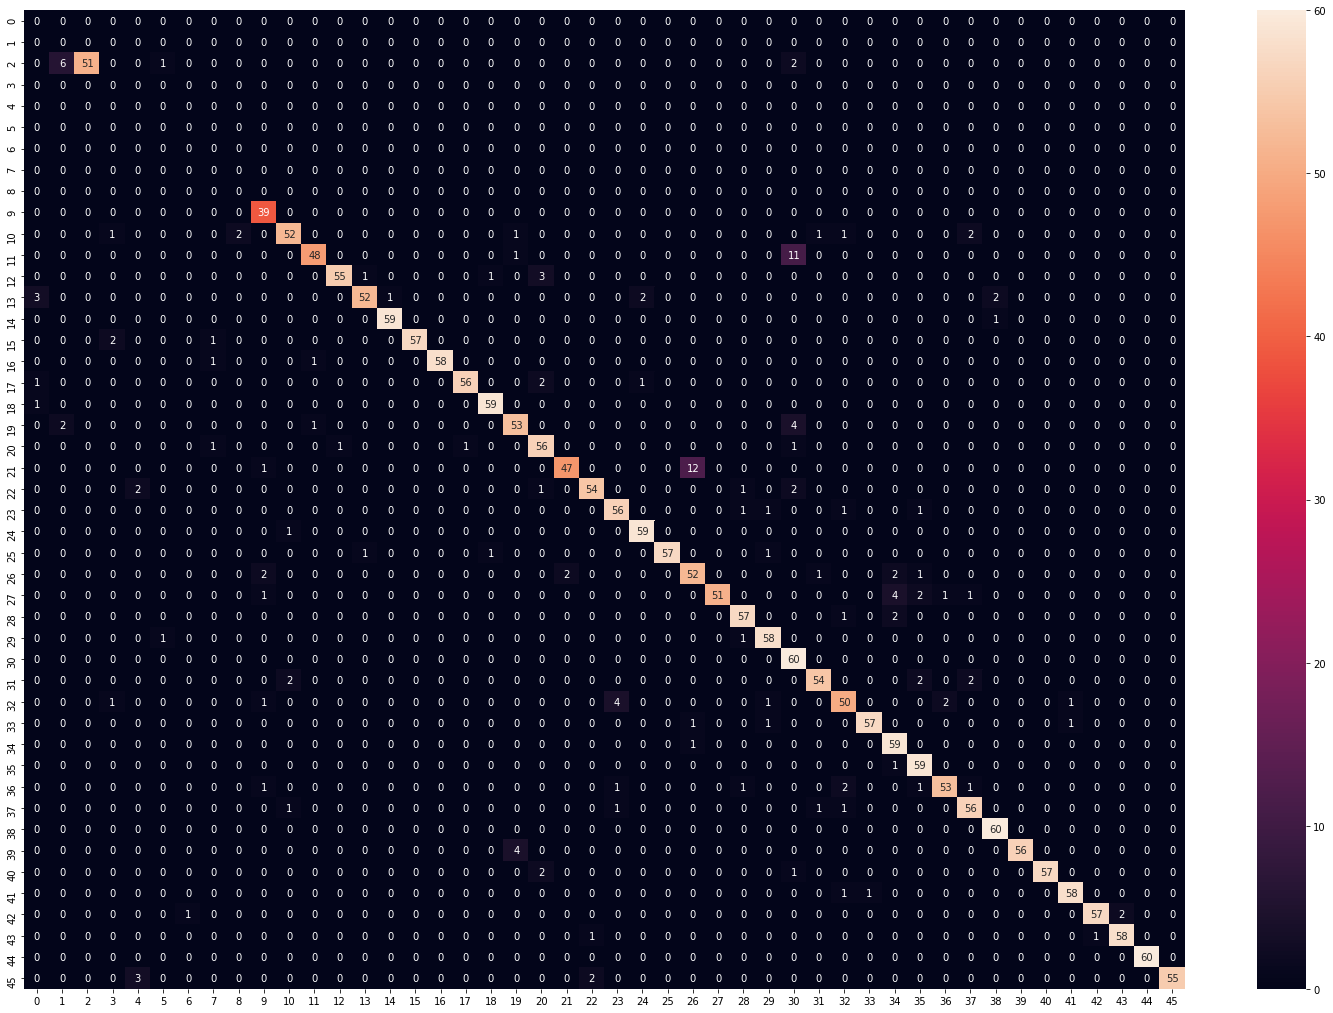

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
mcm = confusion_matrix(np.argmax(test_targets,axis=-1),alphabet_predictions)
plt.figure(figsize=(26,18))
ax= plt.subplot()
sns.heatmap(mcm,annot=True,ax=ax)


In [ ]:
from sklearn.metrics import roc_curve
alphabet_predictions = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, alphabet_predictions)

NameError: ignored

In [ ]:
len(alphabet_predictions)

2259

In [ ]:
len(y_true)

2259

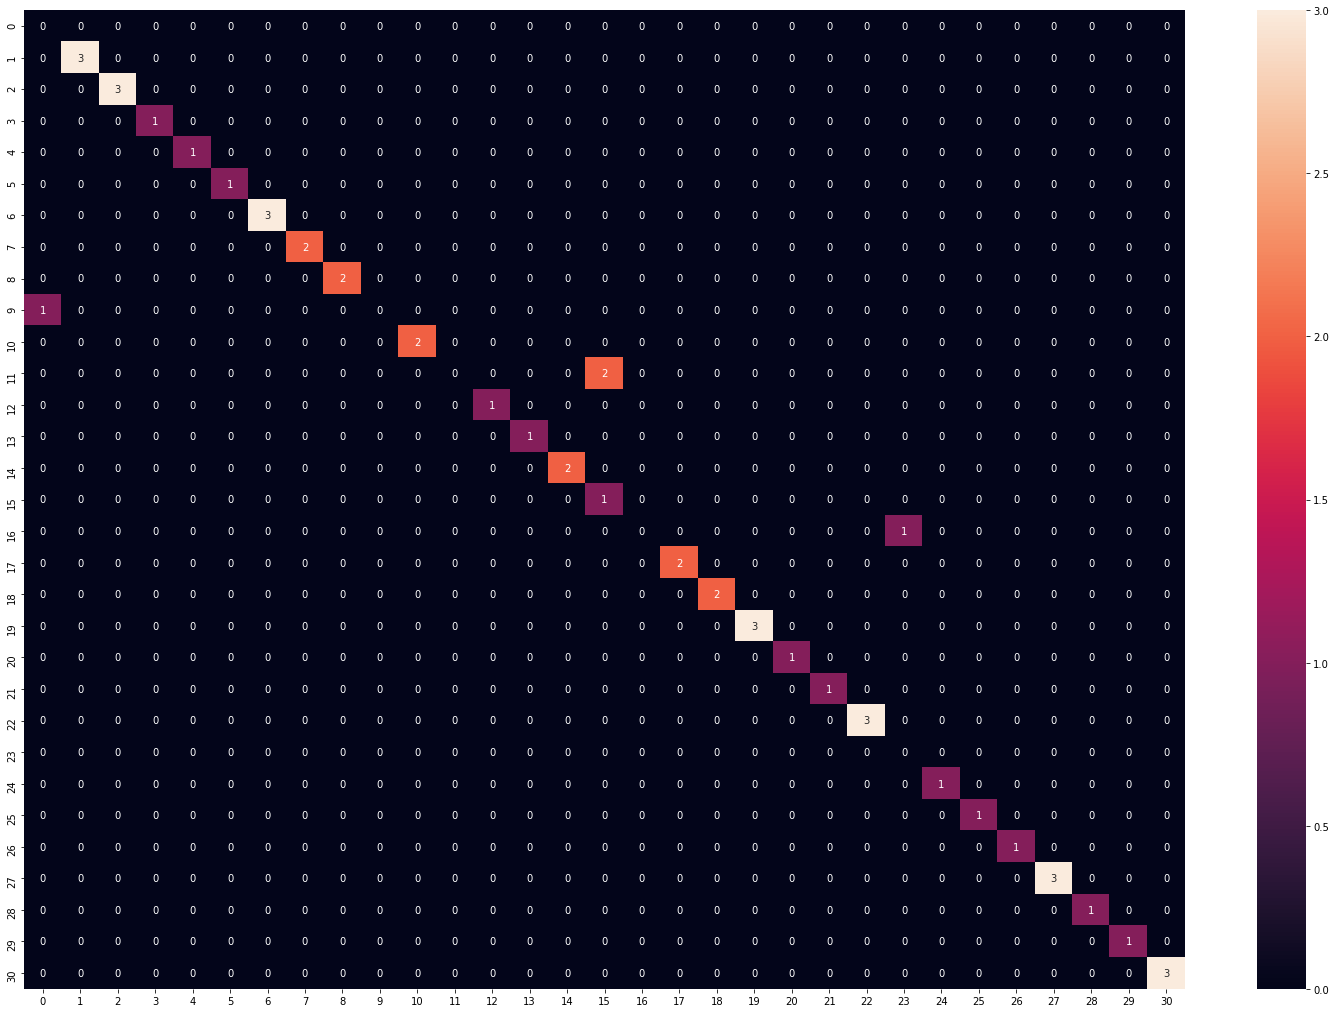

In [ ]:

from sklearn.metrics import  confusion_matrix
import seaborn as sns
mcm = confusion_matrix(y_true[:50],alphabet_predictions[:50])
plt.figure(figsize=(26,18))
ax= plt.subplot()
sns.heatmap(mcm,annot=True,ax=ax)

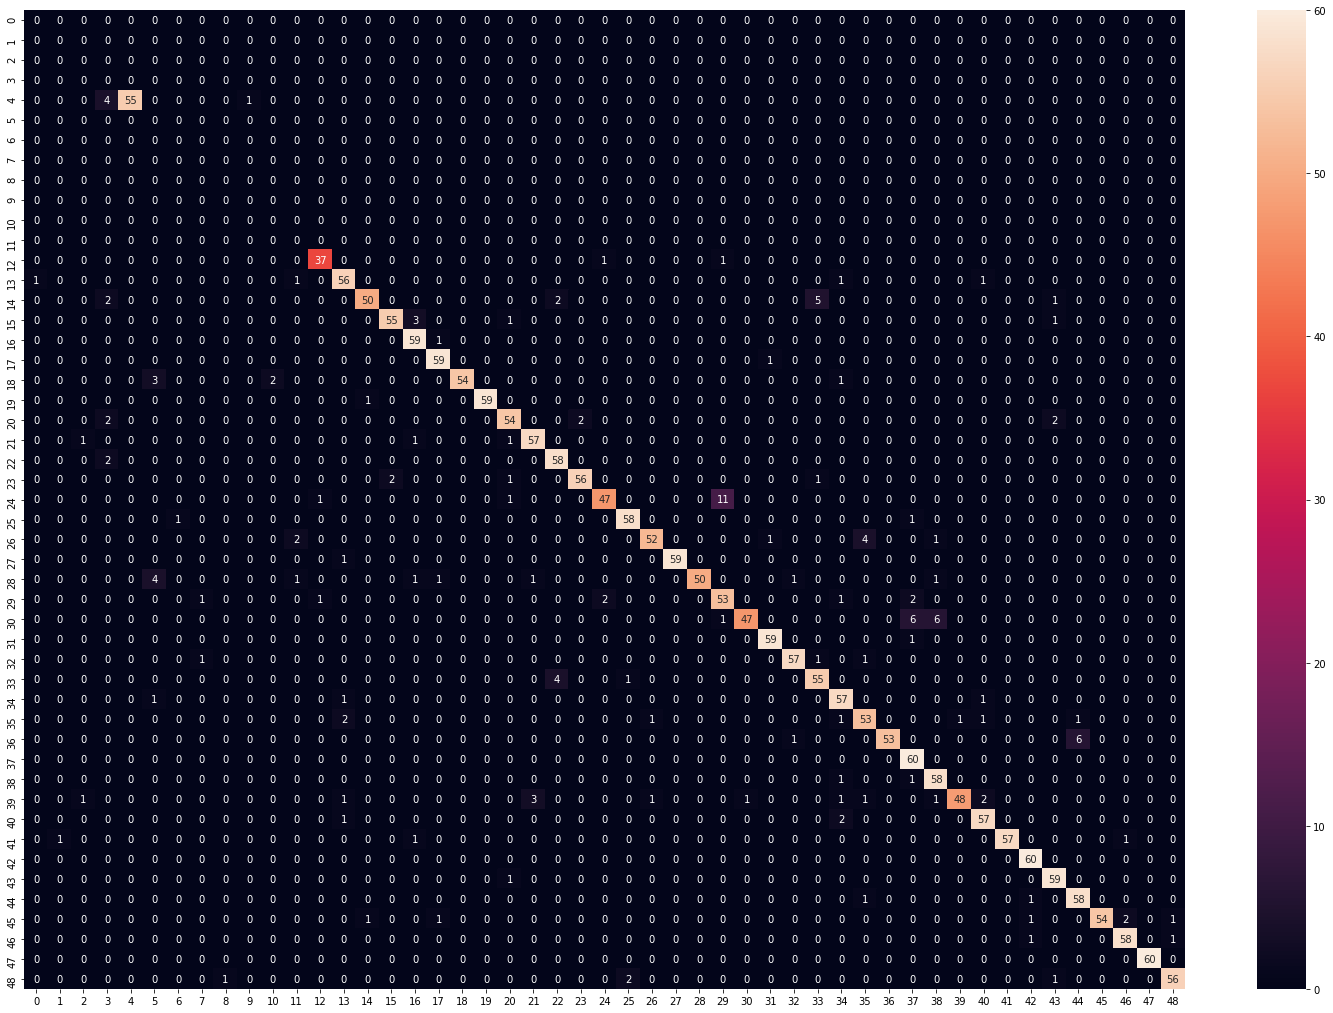

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
mcm = confusion_matrix(y_true,alphabet_predictions)
plt.figure(figsize=(26,18))
ax= plt.subplot()
sns.heatmap(mcm,annot=True,ax=ax)

In [ ]:
y_true.append(0)
y_true.append(1)
y_true.append(2)
y_true.append(3)
y_true.append(4)
y_true.append(6)
y_true.append(7)
y_true.append(8)
y_true.append(9)
y_true.append(10)
y_true.append(11)
y_true.append(12)

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
mcm = confusion_matrix(y_true,alphabet_predictions)
plt.figure(figsize=(26,18))
ax= plt.subplot()
sns.heatmap(mcm,annot=True,ax=ax)

ValueError: ignored

In [ ]:
type(y_true)

list

In [ ]:
testing = np.array(y_true)

In [ ]:
np.unique(testing),len(np.unique(testing))

(array([ 5, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
        29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
        46, 47, 48, 49]), 38)

In [ ]:
dek ekane 0,1,2,3,4,50 nai
ki bolto ki dibo 
e to jamelay potlam 
acis


In [ ]:
type(alphabet_predictions)

list

In [ ]:
testing2 = np.array(alphabet_predictions)
np.unique(testing2),len(np.unique(testing2))

(array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 49)

In [ ]:
type(test_targets)

numpy.ndarray

In [ ]:
np.unique(test_targets),len(np.unique(test_targets))

(array([0., 1.], dtype=float32), 2)

In [ ]:
test_targets

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_true2 = [np.argmax(y_test) for y_test in test_targets]

In [ ]:
y_true2 = np.array(y_true2)
np.unique(y_true2),len(np.unique(y_true2))

(array([ 5, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
        29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
        46, 47, 48, 49]), 38)